In [4]:
from astropy.io import fits

from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

In [2]:
# Replace with the path to your file
filename = 'hlsp_ceers_jwst_nircam_nircam10_f356w_dr0.6_i2d.fits'

# Open the FITS file
hdulist = fits.open(filename)

# Display header information
hdulist[0].header


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-12-27T23:56:14.791' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'hlsp_ceers_jwst_nircam_nircam10_f356w_dr0.6_i2d.fits' / Name of the f
SDP_VER = '2022_4a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-059'      / S&OC PRD version number used in data processing
OSS_VER = '8.5     '           / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.8.5   '        

Set DATE-AVG to '2022-12-22T04:14:17.681' from MJD-AVG.
Set DATE-END to '2022-12-22T04:41:13.578' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to     8.917036 from OBSGEO-[XYZ].
Set OBSGEO-H to 1678060450.793 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


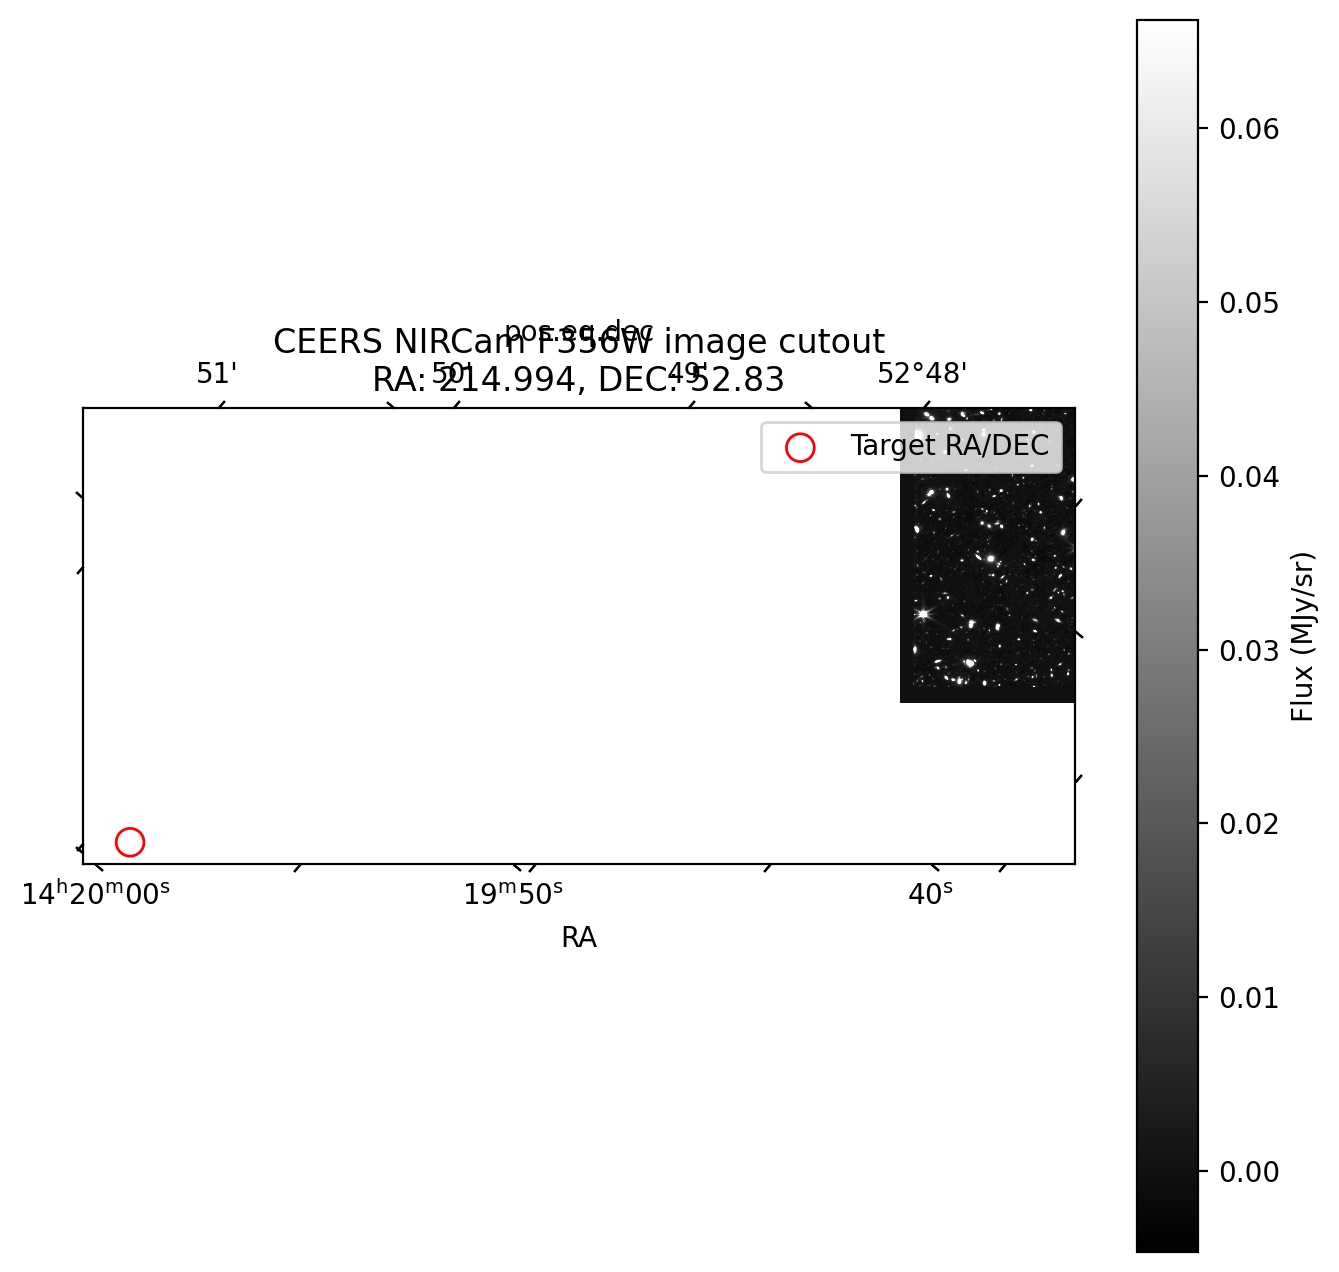

In [6]:
# Your FITS file path
fits_file = 'hlsp_ceers_jwst_nircam_nircam10_f356w_dr0.6_i2d.fits'

# Your target coordinates (Replace these with your coordinates)
target_ra = 214.994  # in degrees (example RA)
target_dec = 52.830  # in degrees (example DEC)
target_coord = SkyCoord(target_ra, target_dec, unit=(u.deg, u.deg), frame='icrs')

# Load the FITS file header and WCS information without loading full data
hdulist = fits.open(fits_file, memmap=True)
wcs = WCS(hdulist['SCI'].header)

# Convert RA, DEC to pixel coordinates
x_pix, y_pix = wcs.world_to_pixel(target_coord)
x_pix, y_pix = int(x_pix), int(y_pix)

# Define image cutout size (e.g., 100 x 100 pixels around the target)
cutout_size = 100
x_min = max(x_pix - cutout_size//2, 0)
x_max = x_pix + cutout_size//2
y_min = max(y_pix - cutout_size//2, 0)
y_max = y_pix + cutout_size//2

# Read only the required image section (to handle large file efficiently)
image_data = hdulist['SCI'].data[y_min:y_max, x_min:x_max]

# Plotting the image section
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcs.slice((slice(y_min,y_max), slice(x_min,x_max))))
im = ax.imshow(image_data, origin='lower', cmap='gray', vmin=np.percentile(image_data,5), vmax=np.percentile(image_data,99))
ax.scatter(x_pix - x_min, y_pix - y_min, s=100, edgecolor='red', facecolor='none', label='Target RA/DEC')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.legend()

plt.colorbar(im, ax=ax, orientation='vertical', label='Flux (MJy/sr)')
plt.title(f'CEERS NIRCam F356W image cutout\nRA: {target_ra}, DEC: {target_dec}')
plt.show()

# Close the file after usage
hdulist.close()
